In [89]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import subprocess
import scipy as sc
from itertools import product

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.figsize": (4, 3.5),
    "text.latex.preamble": "\n".join([
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        r"\usepackage[detect-all,locale=FR]{siunitx}",
    ]),
    'lines.markersize': 10,
    'lines.color': 'grey',
    'scatter.marker': '+',
    'errorbar.capsize': 3,
    'savefig.bbox': 'tight',
})

In [90]:
path = '../'
executable = 'bin/ex2'
export_path = path + 'rapport/figures/'
data_path = 'data/'
config_path = 'bin/'
config_name = 'no_excitation'
config_ext = '.conf'

In [91]:
def stringify_dict(d: dict, sep=',') -> str:
    return sep.join(map(lambda a: str(a[0]) + "=" + str(a[1]), tuple(d.items())))

In [92]:
def run(config_file: str, output_file: str, params: dict = {}) -> None:
    # print(f"Running with config file {config_file}")
    options = stringify_dict(params, sep=' ')
    cmd = f"{path}{executable} {path}{config_file} output='{path}{output_file}' {options}"
    print(f"Running command `{cmd}`")
    subprocess.run(cmd, shell=True, stdout=subprocess.DEVNULL)
    # print("Done")

In [93]:
nsteps = np.array([*range(500, 2001, 100)])
nsimul = len(nsteps)  # Number of simulations to perform

conf = {}
with open(path + config_path + config_name + config_ext, 'r') as f:
    lines = f.read().split('\n')

for line in lines:
    if not line:
        continue
    name, _, val, *_ = line.split(' ')
    name = name.strip()
    val = val.strip()
    try:
        conf[name] = float(val)
    except ValueError:
        conf[name] = val

# 3 perides
omega0 = np.sqrt(conf['L']/conf['g'])
tFin = 6 * np.pi / omega0
dt = conf['tFin'] / nsteps

In [94]:
def analytical_theta(t: float) -> float:
    return conf['theta0'] * np.cos(omega0 * t)

In [95]:
def analytical_thetadot(t: float) -> float:
    return -omega0 * conf['theta0'] * np.sin(omega0 * t)

In [96]:
%%bash
cd .. && make clean && make

clang++ -o bin/ex2 src/Ex2_2024_student.cpp -std=c++17 -Wall -Wextra -O2 


src/Ex2_2024_student.cpp:101:16: warning: unused variable 'pi' [-Wunused-variable]
  101 |                 const double pi = 3.1415926535897932384626433832795028841971e0;
      |                              ^~
1 warning generated.


In [97]:
params_variations = {
    'nsteps': nsteps,
    'tFin': [tFin],
}
all_params = tuple(
    {a: b for a, b in zip(params_variations.keys(), c)} for c in product(*params_variations.values())
)

# Run simulations
outputs = []  # List to store output file names
for params in all_params:
    output_file = f"{data_path}{config_name},{stringify_dict(params)}.out"
    outputs.append(output_file)
    run(f'{config_path}{config_name}{config_ext}', output_file, params)

Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=500,tFin=132.01419412867537.out' nsteps=500 tFin=132.01419412867537`
Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=600,tFin=132.01419412867537.out' nsteps=600 tFin=132.01419412867537`
Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=700,tFin=132.01419412867537.out' nsteps=700 tFin=132.01419412867537`
Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=800,tFin=132.01419412867537.out' nsteps=800 tFin=132.01419412867537`
Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=900,tFin=132.01419412867537.out' nsteps=900 tFin=132.01419412867537`
Running command `../bin/ex2 ../bin/no_excitation.conf output='../data/no_excitation,nsteps=1000,tFin=132.01419412867537.out' nsteps=1000 tFin=132.01419412867537`
Running command `../bin/ex2 ../bin/no_

In [98]:
# Filter stuff
file_and_params = []

for file, params in zip(outputs, all_params):
    file_and_params.append((file, params))

file_and_params

[('data/no_excitation,nsteps=500,tFin=132.01419412867537.out',
  {'nsteps': 500, 'tFin': 132.01419412867537}),
 ('data/no_excitation,nsteps=600,tFin=132.01419412867537.out',
  {'nsteps': 600, 'tFin': 132.01419412867537}),
 ('data/no_excitation,nsteps=700,tFin=132.01419412867537.out',
  {'nsteps': 700, 'tFin': 132.01419412867537}),
 ('data/no_excitation,nsteps=800,tFin=132.01419412867537.out',
  {'nsteps': 800, 'tFin': 132.01419412867537}),
 ('data/no_excitation,nsteps=900,tFin=132.01419412867537.out',
  {'nsteps': 900, 'tFin': 132.01419412867537}),
 ('data/no_excitation,nsteps=1000,tFin=132.01419412867537.out',
  {'nsteps': 1000, 'tFin': 132.01419412867537}),
 ('data/no_excitation,nsteps=1100,tFin=132.01419412867537.out',
  {'nsteps': 1100, 'tFin': 132.01419412867537}),
 ('data/no_excitation,nsteps=1200,tFin=132.01419412867537.out',
  {'nsteps': 1200, 'tFin': 132.01419412867537}),
 ('data/no_excitation,nsteps=1300,tFin=132.01419412867537.out',
  {'nsteps': 1300, 'tFin': 132.01419412867

# Plots!

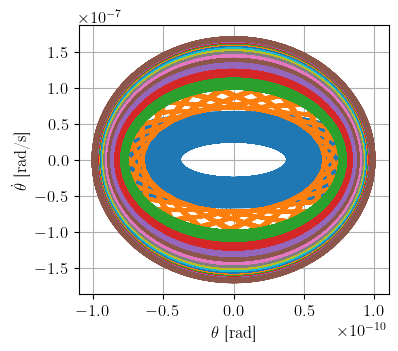

In [105]:
for (file, params) in file_and_params:
    data = np.loadtxt(path + file)
    t, theta, thetadot = data[:,0], data[:,1], data[:,2]
    # p = m L^2 thetadot
    plt.plot(theta, thetadot / (conf['m'] * conf['L']**2))

# plt.axis('equal')
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'$\dot{\theta}$ [rad/s]')
plt.grid()
# plt.legend()
plt.savefig(export_path + 'feuriste.pdf')

## Position error

In [100]:
pos_errors = np.zeros(nsimul)
speed_errors = np.zeros(nsimul)
for i, (file, params) in enumerate(file_and_params):
    data = np.loadtxt(path + file)
    tf, thetaf, thetadotf = data[-1,0], data[-1,1], data[-1,2]
    actual_theta = analytical_theta(tf)
    actual_thetadot = analytical_thetadot(tf)
    pos_errors[i] = abs(actual_theta - thetaf)
    speed_errors[i] = abs(actual_thetadot - thetadotf)

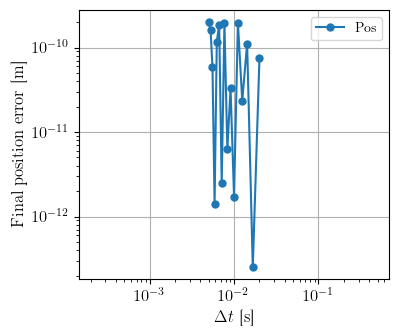

In [101]:
plt.loglog(dt, pos_errors, '.-', label='Pos')

plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'Final position error [m]')
plt.xticks()
plt.yticks()
plt.grid()
plt.legend()
plt.axis('equal')
plt.savefig(export_path + 'no_excitation_pos_conv.pdf')

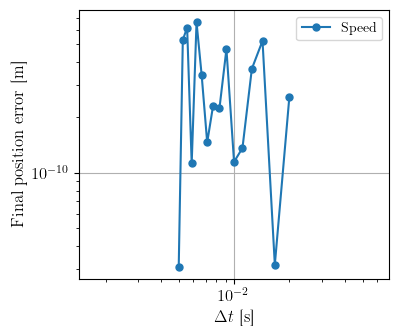

In [102]:
plt.loglog(dt, speed_errors, '.-', label='Speed')

plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'Final position error [m]')
plt.xticks()
plt.yticks()
plt.grid()
plt.legend()
plt.axis('equal')
plt.savefig(export_path + 'no_excitation_pos_conv.pdf')

## Energy error

In [103]:
%matplotlib inline
plt.loglog(dt, e1, 'r|-', label='Explicit')
plt.loglog(dt, e2, 'g_-', label='Implicit')
plt.loglog(dt, e3, 'b.-', label='Semi-implicit')

x1, x2, y1, y2 = 9e-3, 1e-1, 4e-2, 5e-1
axins = plt.gca().inset_axes(
    [0.14, 0.42, 0.3, 0.3],
    xlim=(x1, x2), ylim=(y1, y2),
)
axins.loglog(dt, e1, 'r|-', label='Explicit')
axins.plot(dt, e2, 'g_-', label='Implicit')
axins.grid()
axins.set_aspect('equal')
plt.gca().indicate_inset_zoom(axins, edgecolor="black")

plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'Energy error [J]')
plt.xticks()
plt.yticks()
plt.grid()
plt.legend(loc='center right')
plt.axis('equal')
plt.savefig(export_path + 'nograv_energy_error_all.pdf')

NameError: name 'e1' is not defined

## Energy steps

In [ ]:
%matplotlib inline

def fit_func(xdata, gamma):
    return 0.748151036383996-1 + np.exp(gamma * xdata)

def plot_energies(dataset, **kwargs):
    for i, (file, params) in enumerate(dataset):
        if params['nsteps'] not in [60, 200, 400, 1600, 4000]:
            continue
        data = np.loadtxt(path + file)
        t, En1 = data[:, 0], data[:, 5]
        plt.plot(t, En1, label=f"$n_\\textrm{{steps}}={params['nsteps']}$", **kwargs)
        things = sc.optimize.curve_fit(fit_func, t, En1)
        print(f"nsteps={params['nsteps']}, gamma={things[0][0]:.4f}")
        # plt.plot(t, fit_func(t, *things[0]), **kwargs)

    plt.xlabel(r'$t$ [s]')
    plt.ylabel(r'$E_\textrm{mec}$ [J]')
    plt.xticks()
    plt.yticks()
    plt.grid()
    plt.legend()

In [ ]:
# plt.close()
plot_energies(explicit)
# plt.yscale('log')
ratio = 0.5
xleft, xright = plt.xlim()
ybottom, ytop = plt.ylim()
plt.gca().set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
plt.savefig(export_path + 'nograv_energy_explicit.pdf')
plt.show()

In [ ]:
plot_energies(implicit)
# plt.yscale('log')
ratio = 0.5
xleft, xright = plt.xlim()
ybottom, ytop = plt.ylim()
plt.gca().set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
plt.savefig(export_path + 'nograv_energy_implicit.pdf')
plt.show()

In [ ]:
plot_energies(semi_implicit)
ratio = 0.5
xleft, xright = plt.xlim()
ybottom, ytop = plt.ylim()
plt.gca().set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
plt.legend(ncols=2)
plt.ticklabel_format(useOffset=False)
plt.savefig(export_path + 'nograv_energy_semiimplicit.pdf')
plt.show()

# plot_energies(explicit, c='r')
# plot_energies(implicit, c='g')
# plot_energies(semi_implicit, c='b')